# HFF Water Quality

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
ipe_df = pd.read_csv('data/15_min_data_HFF/IPE 15 min 2022-08-08.csv')
ipe_df

,contTime,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
0,2014-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-06-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-06-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285217,2022-08-07 23:00:00,5.48,NaN,NaN,0.34,NaN,0.02,NaN,7.49,NaN,...,18.66,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285218,2022-08-07 23:15:00,5.74,NaN,NaN,0.27,NaN,0.03,NaN,7.48,NaN,...,18.64,123.5,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285219,2022-08-07 23:30:00,6.37,NaN,NaN,0.29,NaN,0.03,NaN,7.47,NaN,...,18.64,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285220,2022-08-07 23:45:00,6.40,NaN,NaN,0.34,NaN,0.02,NaN,7.48,NaN,...,18.63,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# check first day to make sure averages make sense later
ipe_df.loc[(ipe_df['contTime']<='2014-06-20 24:00:00')]

,contTime,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
0,2014-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-06-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-06-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2014-06-20 22:45:00,2.34,NaN,NaN,0.37,NaN,-0.05,NaN,6.10,NaN,...,12.507,97.5,83.0,11.655,NaN,NaN,NaN,NaN,NaN,NaN
92,2014-06-20 23:00:00,2.24,NaN,NaN,0.35,NaN,0.04,NaN,6.05,NaN,...,12.442,97.3,83.0,11.657,NaN,NaN,NaN,NaN,NaN,NaN
93,2014-06-20 23:15:00,2.52,NaN,NaN,0.27,NaN,0.00,NaN,5.94,NaN,...,12.380,97.2,83.0,11.658,NaN,NaN,NaN,NaN,NaN,NaN
94,2014-06-20 23:30:00,2.59,NaN,NaN,0.29,NaN,-0.05,NaN,5.87,NaN,...,12.334,97.0,83.0,11.659,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ipe_df['contTime'] = pd.to_datetime(ipe_df['contTime'])
ipe_df.set_index(['contTime'], inplace=True)
ipe_df

,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,Temp_C,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
contTime,,,,,,,,,,,,,,,,,,,,,
2014-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-07 23:00:00,5.48,NaN,NaN,0.34,NaN,0.02,NaN,7.49,NaN,18.66,...,18.66,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 23:15:00,5.74,NaN,NaN,0.27,NaN,0.03,NaN,7.48,NaN,18.64,...,18.64,123.5,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 23:30:00,6.37,NaN,NaN,0.29,NaN,0.03,NaN,7.47,NaN,18.64,...,18.64,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
ipe_daily = ipe_df.resample('D').mean()
ipe_daily

,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,Temp_C,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
contTime,,,,,,,,,,,,,,,,,,,,,
2014-06-20,2.282571,NaN,2.883333,0.343889,NaN,-0.009167,NaN,6.402500,NaN,13.020333,...,13.020333,98.772222,83.000000,11.642306,2.948023,0.603837,0.102474,13.602552,7.434667,119.362484
2014-06-21,2.491979,2.487097,NaN,0.366667,0.367527,-0.003125,-0.002581,6.491563,6.511828,12.617740,...,12.617740,97.936458,83.302083,11.666146,3.087716,0.643661,0.112450,13.759623,7.438532,119.774590
2014-06-22,2.760521,2.760521,NaN,0.370417,0.370417,-0.002396,-0.002396,6.799479,6.799479,12.587917,...,12.587917,98.336458,83.875000,11.690604,3.302915,0.710180,0.154355,13.946474,7.471170,120.355465
2014-06-23,3.366875,3.366875,4.056667,0.427187,0.427187,0.011667,0.011667,6.973333,6.973333,12.869354,...,12.869354,100.618750,85.187500,11.717281,3.678330,0.552335,0.076311,13.898306,7.783264,119.795716
2014-06-24,4.185000,4.185000,NaN,0.578438,0.578438,0.051042,0.051042,6.847812,6.847812,12.998385,...,12.998385,104.945833,88.541667,11.707031,3.881812,0.502070,0.072871,14.001303,7.923084,121.559347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-04,4.318333,4.318333,NaN,0.313750,0.313750,0.028958,0.028958,7.168958,7.168958,19.131562,...,19.131562,155.598958,0.110000,13.178125,3.502886,0.350678,0.072960,18.002343,6.298646,147.223717
2022-08-05,4.368316,4.368316,NaN,0.346526,0.346526,0.035368,0.035368,7.249474,7.249474,19.065474,...,-64.456042,66.297917,-83.214062,-70.295208,3.696916,0.318075,0.048990,17.950932,6.328682,146.903631
2022-08-06,4.182292,4.182292,NaN,0.421458,0.421458,0.057917,0.057917,7.358333,7.358333,19.076875,...,19.076875,140.838542,0.102917,13.171146,3.099911,0.334100,0.052274,17.956837,6.276374,148.263877


<AxesSubplot:xlabel='contTime'>

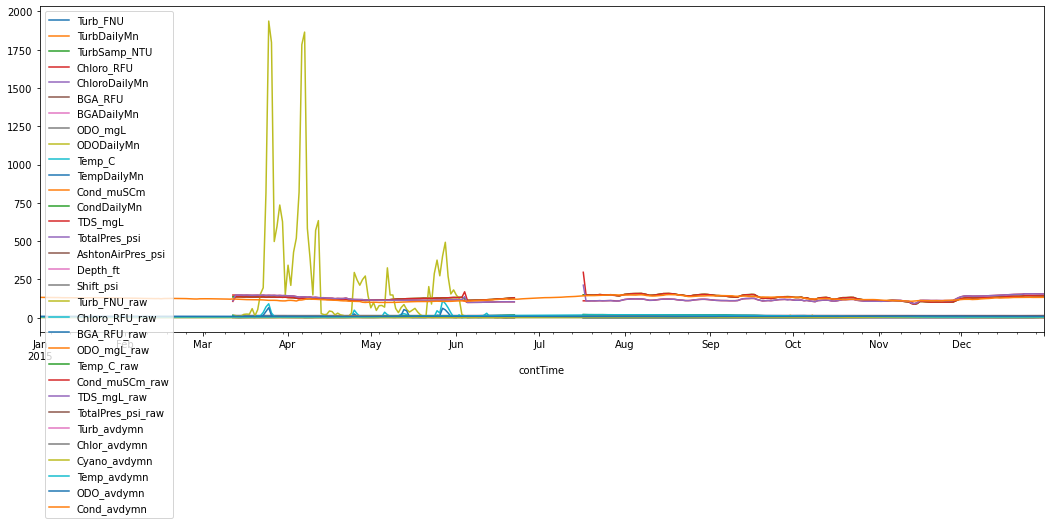

In [50]:
ipe_daily.loc['2015'].plot(figsize=(18,6))

In [49]:
ipe_daily.corr()

,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,Temp_C,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
Turb_FNU,1.000000,1.000000,0.846794,0.037951,0.038028,0.045914,0.045974,-0.106226,-0.106384,0.131932,...,0.075317,0.117861,-0.186676,-0.062740,0.444560,0.002021,0.033395,0.146615,-0.127903,0.120024
TurbDailyMn,1.000000,1.000000,0.846599,0.038029,0.038029,0.045974,0.045974,-0.106379,-0.106383,0.131400,...,0.075206,0.117732,-0.186384,-0.062787,0.444533,0.001923,0.033271,0.146854,-0.128050,0.119949
TurbSamp_NTU,0.846794,0.846599,1.000000,-0.041972,-0.042709,0.010050,0.009113,-0.041753,-0.043425,0.184059,...,0.056685,0.129263,-0.183241,-0.069539,0.451482,-0.035037,0.017238,0.182140,-0.162605,0.224488
Chloro_RFU,0.037951,0.038029,-0.041972,1.000000,1.000000,0.832444,0.832437,0.165823,0.165730,-0.148945,...,-0.037157,-0.072371,-0.067288,0.020961,-0.025289,0.359467,0.300468,-0.152472,0.267528,-0.181997
ChloroDailyMn,0.038028,0.038029,-0.042709,1.000000,1.000000,0.832437,0.832437,0.165730,0.165730,-0.148814,...,-0.037088,-0.072396,-0.067302,0.020981,-0.025315,0.359444,0.300438,-0.152415,0.267495,-0.182039
BGA_RFU,0.045914,0.045974,0.010050,0.832444,0.832437,1.000000,1.000000,0.107537,0.107425,-0.120049,...,-0.019398,-0.035762,-0.054471,0.021268,-0.004338,0.276315,0.262714,-0.120598,0.197744,-0.109624
BGADailyMn,0.045974,0.045974,0.009113,0.832437,0.832437,1.000000,1.000000,0.107426,0.107425,-0.119915,...,-0.019332,-0.035789,-0.054473,0.021286,-0.004365,0.276287,0.262679,-0.120531,0.197704,-0.109665
ODO_mgL,-0.106226,-0.106379,-0.041753,0.165823,0.165730,0.107537,0.107426,1.000000,1.000000,-0.505931,...,-0.038998,-0.116644,0.039728,0.040855,-0.184692,0.423161,0.341786,-0.503375,0.610970,-0.490702
ODODailyMn,-0.106384,-0.106383,-0.043425,0.165730,0.165730,0.107425,0.107425,1.000000,1.000000,-0.505888,...,-0.038834,-0.116817,0.039856,0.040915,-0.184847,0.423094,0.341658,-0.503195,0.610907,-0.490948
Temp_C,0.131932,0.131400,0.184059,-0.148945,-0.148814,-0.120049,-0.119915,-0.505931,-0.505888,1.000000,...,0.115305,0.170674,-0.062061,-0.096685,0.373034,-0.379834,-0.345615,0.986202,-0.840037,0.617384


In [59]:
hydro_df = pd.read_csv('data/IslandPark.TS.csv')
hydro_df['date'] = pd.to_datetime(hydro_df['date'])
hydro_df.set_index(['date'], inplace=True)
hydro_df.columns

Index(['elevation.ft', 'volume.af', 'smoothed.vol', 'smoothed.elev',
       'surfacearea.acres', 'net.evap.af', 'delta.V.af', 'regQ.cfs',
       'gain.cfs', 'smoothed.natQ.cfs'],
      dtype='object')

In [61]:
# calculate exposed shoreline
hydro_df['exposed_shore'] = 8000 - hydro_df['surfacearea.acres']

<AxesSubplot:xlabel='date'>

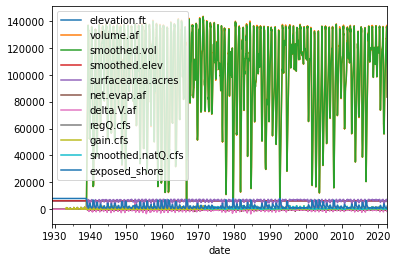

In [62]:
hydro_df.plot()

In [57]:
climate_df = pd.read_csv('data/Clean.Climate.TS.csv')
climate_df['Date'] = pd.to_datetime(climate_df['Date'])
climate_df.set_index(['Date'], inplace=True)
climate_df.drop(['GT.TAVE', 'GT.TMIN', 'GT.TMAX', 'GT.DP', 'GT.AP', 'GT.SWE', 'PB.TAVE',
       'PB.TMIN', 'PB.TMAX', 'PB.DP','HFW.AP', 'TR.SWE', 'FR.SWE', 'HF.SWE', 'HFW.SWE', 'AG.DP', 'AG.ET',
       'HFW.Cum.P', 'AG.Cum.P', 'AG.Cum.ET', 'PB.AP', 'PB.SWE', 'BB.TAVE', 'BB.TMIN', 'BB.TMAX', 'BB.DP', 'BB.AP',
       'BB.SWE', 'LL.TAVE', 'LL.TMIN', 'LL.TMAX', 'LL.DP', 'LL.AP', 'LL.SWE', 'GL.TAVE',
       'GL.TMIN', 'GL.TMAX', 'GL.DP', 'GL.AP', 'GL.SWE', 'PC.TAVE', 'PC.TMIN', 'PC.TMAX',
       'PC.DP', 'PC.AP', 'PC.SWE', 'AL.TAVE', 'AL.TMIN', 'AL.TMAX', 'AL.DP', 'AL.AP',
       'AS.TAVE', 'AS.TMIN', 'AS.TMAX', 'AS.DP', 'AS.AP', 'AS.ET', 'RX.TAVE',
       'RX.TMIN', 'RX.TMAX', 'RX.DP', 'RX.AP', 'RX.ET', 'TR.TAVE', 'FR.TAVE',
       'HF.TAVE', 'VA.TAVE', 'HFW.TAVE', 'TR.TMIN', 'FR.TMIN', 'HF.TMIN',
       'VA.TMIN', 'HFW.TMIN', 'TR.TMAX', 'FR.TMAX', 'HF.TMAX', 'VA.TMAX',
       'HFW.TMAX', 'TR.DP', 'FR.DP', 'HF.DP', 'VA.DP', 'HFW.DP', 'TR.AP',
       'FR.AP', 'HF.AP', 'VA.AP'], axis=1, inplace=True)
climate_df.columns

Index(['WE.TAVE', 'WE.TMIN', 'WE.TMAX', 'WE.DP', 'WE.AP', 'WE.SWE', 'CC.TAVE',
       'CC.TMIN', 'CC.TMAX', 'CC.DP', 'CC.AP', 'CC.SWE', 'IP.TAVE', 'IP.TMIN',
       'IP.TMAX', 'IP.DP', 'IP.AP', 'IP.SWE'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

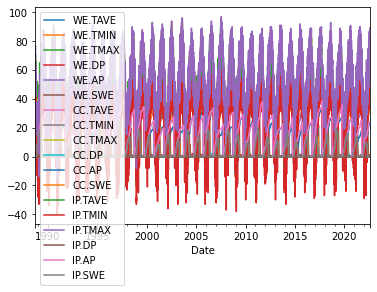

In [58]:
climate_df.plot()